# Задачи
1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

# Описание данных

Имеются следующие данные:

* date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* name – имя пользователя
* transaction – статус транзакции
* minute* – сколько минут прошло с начала дня

*Доступна в данных с 5 шага.

**1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.**

**Вопрос**: сколько в датасете пропущенных значений?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Александр/pj/karpov_courses/Python/Miniprojects/Miniproject_4/transaction_data.csv')
data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [4]:
data.describe(include='all')

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Ответ: пропущенных значений 0.

**2. Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.**

**Вопрос:** расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [5]:
data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [7]:
trans_vc = data.transaction.value_counts()
trans_vc

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

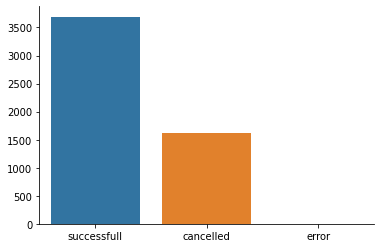

In [15]:
sns.barplot(x=trans_vc.index, y=trans_vc.values)
sns.despine()

**1. successfull**

**2. cancelled**

**3. error**

**3. Подумайте, хорош ли полученный график?**

* Да, это просто график мечты!
* **Плохо видно число наблюдений у некоторых значений**
* У графика неправильно подписаны оси
* На барплоте не может быть квалитативных переменных

**Улучшим график:**

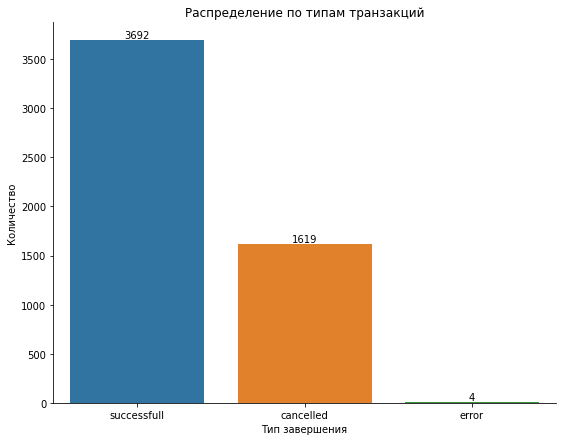

In [14]:
fig, ax = plt.subplots(figsize=(9,7))
sns.barplot(x=trans_vc.index, y=trans_vc.values, ax=ax)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип завершения')
ax.set_title('Распределение по типам транзакций')
ax.bar_label(ax.containers[0])
sns.despine()

**4. Сколько произошло ошибок?**

In [16]:
trans_vc['error']

4

Ответ: 4

**5. Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull**

**Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где**

* по оси x – число транзакций
* по оси y – доля пользователей с таким числом транзакций

Выберите верные утверждения.

* **Пользователи в среднем совершили примерно по 66 транзакций**
* **Максимальное число транзакций – 82**
* Пользователи в среднем совершили по 64 транзакции
* **Примерно 25% пользователей совершили менее 61 транзакции**
* Примерно 25% пользователей совершили более 61 транзакции
* Пользователи в среднем совершили примерно по 56 транзакций
* Максимальное число транзакций – 112
* Пользователи в среднем совершили примерно по 94 транзакции

In [17]:
success_per_user = data.loc[data.transaction == 'successfull'].groupby('name', as_index=False).size()
success_per_user.head()

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


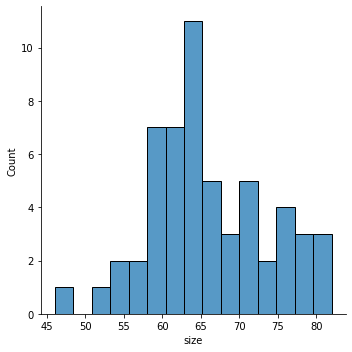

In [22]:
sns.displot(data=success_per_user, x='size', bins=15)
sns.despine()

In [23]:
success_per_user.describe()

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


**6. 💀 Сложное задание! 💀**

**К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:**

* столбцы – имена пользователей
* строки – минута времени осуществления операции (minute)
* значения – число совершённых операций

**Пропущенные значения заполните нулями.**

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [27]:
df = pd.read_csv('C:/Users/Александр/pj/karpov_courses/Python/Miniprojects/Miniproject_4/transaction_data_updated.csv',
                 parse_dates=['date'])
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [28]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [29]:
trans_per_minute = df.groupby(['name', 'minute'], as_index=False).size()
trans_per_minute.head()

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [30]:
pivot_trans_per_minute = trans_per_minute.pivot(index='minute', columns='name', values='size')
pivot_trans_per_minute.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [31]:
pivot_trans_per_minute = pivot_trans_per_minute.fillna(0)
pivot_trans_per_minute.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


**7. Коллега построил следующий график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки.**

* по оси x – минута транзакции (сколько минут прошло с начала дня)
* по оси y – число транзакций

![](https://ucarecdn.com/76242146-2d40-40d8-9a4d-2069d97da56f/-/crop/746x502/52,40/-/preview/)

**Как вы думаете, из-за чего мы видим такую картину? Произошла ошибка, или с данными всё хорошо?**

* Всё хорошо!
* Вместо минут извлекли дни, а не сколько минут прошло с начала дня
* **Извлекли минутную часть времени, а не число минут с начала дня**
* В столбец minute записали число транзакций, совершенных пользователем

In [34]:
minute_trans = pivot_trans_per_minute.sum(axis=1)
minute_trans.head()

minute
0    111.0
1    145.0
2    123.0
3    129.0
4     92.0
dtype: float64

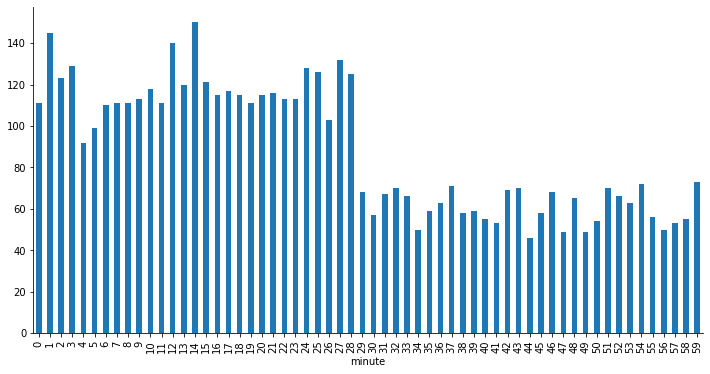

In [36]:
minute_trans.plot.bar(figsize=(12, 6))
sns.despine()

In [37]:
df.date.describe(datetime_is_numeric=True)

count                             5315
mean     2020-03-02 00:43:56.628974592
min                2020-03-02 00:00:00
25%         2020-03-02 00:21:50.500000
50%                2020-03-02 00:43:26
75%         2020-03-02 01:06:22.500000
max                2020-03-02 01:29:05
Name: date, dtype: object

**8. Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).**

**Например:**

date                name               transaction  minute  true_minute

2020-03-02 00:37:20 Ekaterina_Petrova  cancelled    37      37

2020-03-02 01:06:14 Ekaterina_Smirnova successfull  6       66

Данные записаны в df , колонка date прочитана как дата.

In [38]:
df['true_minute'] = df.date.dt.minute + df.date.dt.hour * 60
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


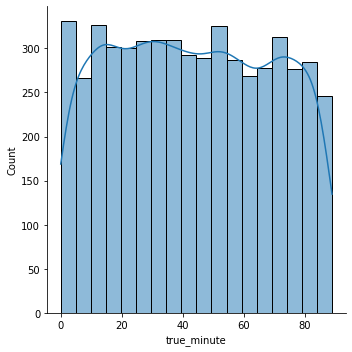

In [40]:
sns.displot(data=df, x='true_minute', kde=True)
sns.despine()